In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.2.2
asttokens                    3.0.0
astunparse                   1.6.3
blinker                      1.9.0
certifi                      2025.4.26
charset-normalizer           3.4.2
click                        8.2.1
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
executing                    2.2.0
filelock                     3.18.0
Flask                        3.1.1
flatbuffers                  25.2.10
fonttools                    4.58.0
fsspec                       2025.3.2
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.71.0
h5py                         3.13.0
idna                         3.10
ipykernel                    6.29.5
ipython                      9.2

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')


[]

In [5]:
import cv2
import imghdr

C:\Users\admin\AppData\Local\Temp\ipykernel_10232\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            if img is None:
                print('Unreadable image {}'.format(image_path))
                os.remove(image_path)
                continue
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

data = tf.keras.utils.image_dataset_from_directory('data', label_mode='int')
class_names = data.class_names  # This is a list of label names in order
print(class_names)

Found 311 files belonging to 3 classes.
['Corn', 'Spinach', 'Tomato']


In [8]:
import numpy as np
from matplotlib import pyplot as plt


In [9]:
data = tf.keras.utils.image_dataset_from_directory('data', label_mode='int')

Found 311 files belonging to 3 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

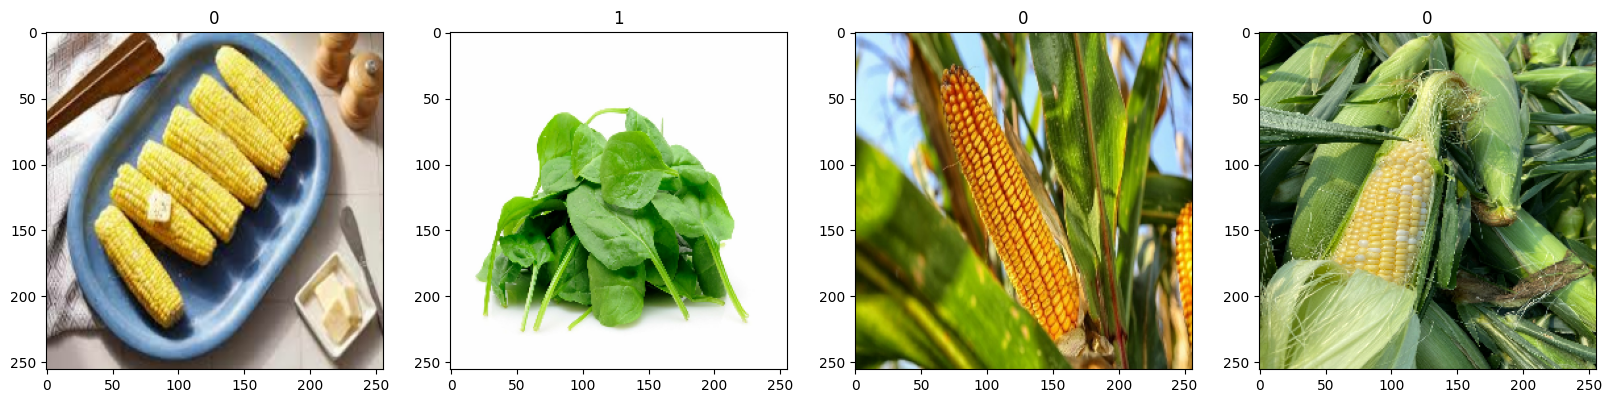

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[6.62837029e-01, 5.60876250e-01, 4.23621327e-01],
          [6.78913891e-01, 5.76953113e-01, 4.39698219e-01],
          [7.06916332e-01, 6.04955554e-01, 4.67700660e-01],
          ...,
          [6.94692075e-01, 8.16145837e-01, 3.49134505e-01],
          [6.78707123e-01, 8.00275743e-01, 3.33609074e-01],
          [6.55039847e-01, 7.76608467e-01, 3.09941798e-01]],
 
         [[5.90513647e-01, 4.88552868e-01, 3.51297945e-01],
          [6.21879399e-01, 5.19918621e-01, 3.82663697e-01],
          [6.72471344e-01, 5.70510566e-01, 4.33255643e-01],
          ...,
          [7.16871917e-01, 8.38252544e-01, 3.71460617e-01],
          [7.03632534e-01, 8.25201154e-01, 3.58534545e-01],
          [6.84973776e-01, 8.06542456e-01, 3.39875758e-01]],
 
         [[5.39930046e-01, 4.37969267e-01, 3.00714344e-01],
          [5.73730469e-01, 4.71769661e-01, 3.34514767e-01],
          [6.29384220e-01, 5.27423441e-01, 3.90168577e-01],
          ...,
          [7.12099671e-01, 8.30525458e-01, 3.6531

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
num_classes = 3  # or: num_classes = len(data.class_names)
model.add(Dense(num_classes, activation='softmax'))

d:\Study stuff\08.VGU\First year\AIot\Image classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.3564 - loss: 1.8381 - val_accuracy: 0.4219 - val_loss: 1.1151
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.4624 - loss: 0.9911 - val_accuracy: 0.7656 - val_loss: 0.6782
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.8615 - loss: 0.5483 - val_accuracy: 0.9062 - val_loss: 0.3234
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.8568 - loss: 0.3119 - val_accuracy: 0.9062 - val_loss: 0.3241
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.9573 - loss: 0.1429 - val_accuracy: 0.9219 - val_loss: 0.2098
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.9493 - loss: 0.1823 - val_accuracy: 1.0000 - val_loss: 0.0388
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.9922 - loss: 0.0616 - val_accuracy: 1.0000 - val_loss: 0.0488
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.9844 - val_loss:

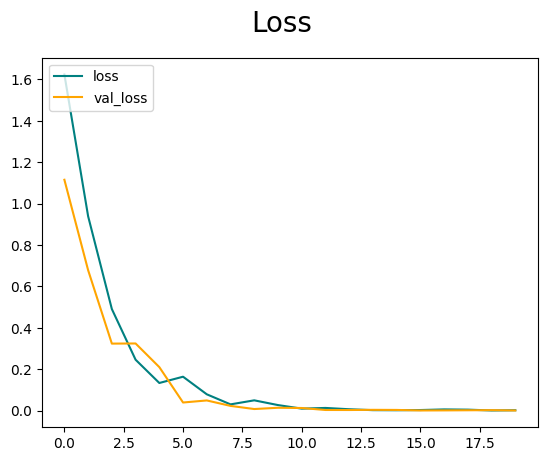

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

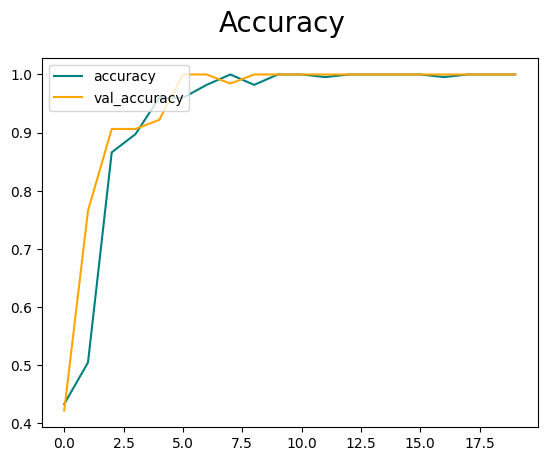

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat_labels = np.argmax(yhat, axis=1)  # Convert probabilities to class labels
    pre.update_state(y, yhat_labels)
    re.update_state(y, yhat_labels)
    acc.update_state(y, yhat_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.4347826, shape=(), dtype=float32)


In [33]:
import cv2

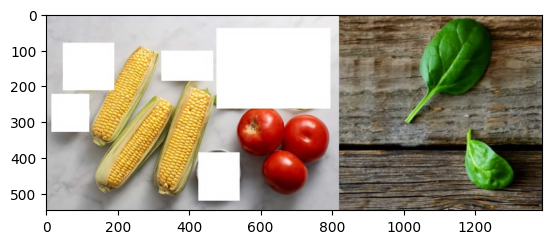

In [34]:
img = cv2.imread('corn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(img)
plt.show()

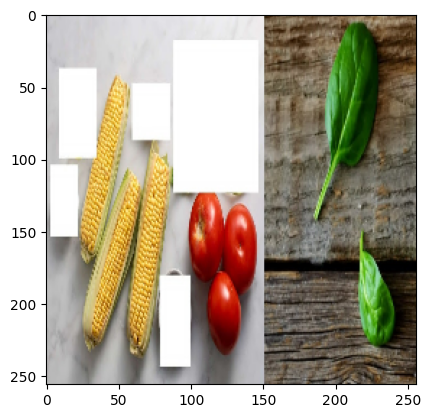

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [37]:
# Get probabilities and class names
probs = yhat[0]  
for idx, prob in enumerate(probs):
    print(f"{class_names[idx]}: {prob*100:.2f}%")
predicted_idx = np.argmax(probs)
print(f"\nPredicted class: {class_names[predicted_idx]} ({probs[predicted_idx]*100:.2f}%)")

Corn: 96.47%
Spinach: 2.30%
Tomato: 1.22%

Predicted class: Corn (96.47%)


In [38]:
from tensorflow.keras.models import load_model
model.save('ingre_label.keras')
loaded_model = load_model('ingre_label.keras')

In [39]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None or img.size == 0:
        return None
    if img.shape[0] == 0 or img.shape[1] == 0:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    resize = tf.image.resize(img, (256,256))
    yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
    probs = yhat[0]
    predicted_idx = np.argmax(probs)
    return class_names[predicted_idx]

In [40]:
# Install ultralytics if not already installed
# !pip install ultralytics opencv-python

from ultralytics import YOLO
import cv2
import os

# Load image
img_path = 'corn.jpg'  # Change to your image file
img = cv2.imread(img_path)

# Load YOLO model (YOLOv8 by default)
model = YOLO('yolov8n.pt')  # You can use 'yolov8s.pt', etc.

# Run detection
results = model(img)


# Create output directory
output_dir = 'slices'
os.makedirs(output_dir, exist_ok=True)

# Iterate over detected bounding boxes and save slices
for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box)
    crop = img[y1:y2, x1:x2]
    out_path = os.path.join(output_dir, f'slice_{i+1}.jpg')
    cv2.imwrite(out_path, crop)
    print(f"Saved: {out_path}")

print("Done slicing detected objects.")


0: 256x640 4 apples, 1 dining table, 1 remote, 90.9ms
Speed: 3.9ms preprocess, 90.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)
Saved: slices\slice_1.jpg
Saved: slices\slice_2.jpg
Saved: slices\slice_3.jpg
Saved: slices\slice_4.jpg
Saved: slices\slice_5.jpg
Saved: slices\slice_6.jpg
Done slicing detected objects.


In [41]:
output_dir = 'slices'
slice_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

predicted_classes = set()

for slice_path in slice_files:
    result = predict_image(slice_path)
    if result is not None:
        predicted_classes.add(result)

print("Stuff founded in the picture:")
for cls in predicted_classes:
    print(cls)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Stuff founded in the picture:
Spinach
Corn
Tomato
